In [1]:
from s2ag.persistence.database_catalogue import DatabaseCatalogue, test_connection

In [12]:
connection = test_connection()
cursor = connection.cursor()

In [3]:
cursor.execute('select distinct cited_id from citation')
rows  = cursor.fetchall()

In [15]:
nodes = set()
for row in rows:
    nodes.add(row[0])

In [16]:
cursor.execute('select distinct citing_id from citation')
rows  = cursor.fetchall()
for row in rows:
    nodes.add(row[0])

In [17]:
nodes

{'01fdf11285bfe021eccc0a9926fa4ff3bea2fe34',
 '0345334de13a87f167927cdb0aeb9427bf4e6941',
 '05f96723518f373016fc7f3ef85972880ff13e12',
 '062de529b091acf2d965a7c697715529b4ff9c88',
 '0798df3023e149b98839ebc3bd4cd12d38975def',
 '08cd650a07b5d008e5b5d7aaf9c73b4e573f0427',
 '0a3e88b795ddc893c3ab7ce2d3ea7e7f01f7d808',
 '0f44050390c8f29c041c8d82008fa07dbfb95772',
 '12aea0814377dbd65f261734d7aa81be907cd181',
 '12c1e98ddbdde57a17c12dc916ff119e10a665d2',
 '13398588e348b083498bce11f4b6512c7f556f88',
 '16ab00313c9c4acba0d3ff643648d64993bad614',
 '182a3712ed12b29f3ddaecead8c0e7cac582fb5e',
 '184f3223e760445fbce4683b311113f985ee7334',
 '18ab60e2cd524d4d8eca056dad5a279a9697246c',
 '1cd72757ee075e80c3cab9b0fbe2db732616b474',
 '1dd4b9b27250e20172260db7fbb4392ff5fec872',
 '1df4e7c89c2b1c89ec5f6a03cb430886ba77fe1c',
 '1e124b9f834d9f48c547f90650a9fcd5e9e071f8',
 '1e61fc3be517cbbf24641aac026c257fafc811b2',
 '1f6d85c5801bf966ceb694b781d532273b5c3820',
 '1ff4ab59f46afb6ad6c79f9c25852e5da09a1125',
 '20aaf1e5

In [20]:
node_map = {}
index = 0
for node in nodes:
    node_map[node] = index
    index += 1

In [21]:
node_map

{'8d51d2e27be1df78179f8b2a19fc002f46228408': 0,
 'e1357a54a2c136dbcd63d4bca3c725e8cd63938a': 1,
 '5c21b73269e7e9ca5d7aecaf7dc24d4ce4be7b70': 2,
 '7961e8fb837c9afbb4a4a6fd72b07af5fa3f88d5': 3,
 'da6ce9df076a7fe81b6119ea05164a6917b59f56': 4,
 '1df4e7c89c2b1c89ec5f6a03cb430886ba77fe1c': 5,
 'f40d544fe2401e70b7e951dc945ce411bfe37b5e': 6,
 'a7a5911db11b78c88a74bf8f9ab448c4cc5e5714': 7,
 '57da2968b3c0258c59415260dff77da95826f0e9': 8,
 'f64d3a093cbb4b1211527719478627590b959f71': 9,
 'c6802303cc977c6c67d959b167366f0bd644d697': 10,
 '4af61656626315a53ecfb72c3c9bea632af2492f': 11,
 '01fdf11285bfe021eccc0a9926fa4ff3bea2fe34': 12,
 'e2e1aa8b8b1dfed9c65589d5293acbae4cbe061a': 13,
 '12c1e98ddbdde57a17c12dc916ff119e10a665d2': 14,
 'faf1ea5e936cba2efc79e2295edaac463c30bc1d': 15,
 'a813dc4e289a56ae23bcca5204433ce7d0447f57': 16,
 '8c2368c105302d57c078cdf44559058f60fc475a': 17,
 'dd8bd9c713ace9681cc2967a914c1628d14ade31': 18,
 '7234495241b9d7393fb27182686eb065985fd647': 19,
 '16ab00313c9c4acba0d3ff643648

In [22]:
import networkx as nx
g = nx.DiGraph()

In [23]:
for i in range(206):
    g.add_node(i)

In [24]:
cursor.execute('select cited_id, citing_id from citation')
rows  = cursor.fetchall()

In [25]:
for row in rows:
    from_node = node_map[row[0]]
    to_node = node_map[row[1]]
    g.add_edge(from_node, to_node)

In [26]:
cursor.close()
connection.close()

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

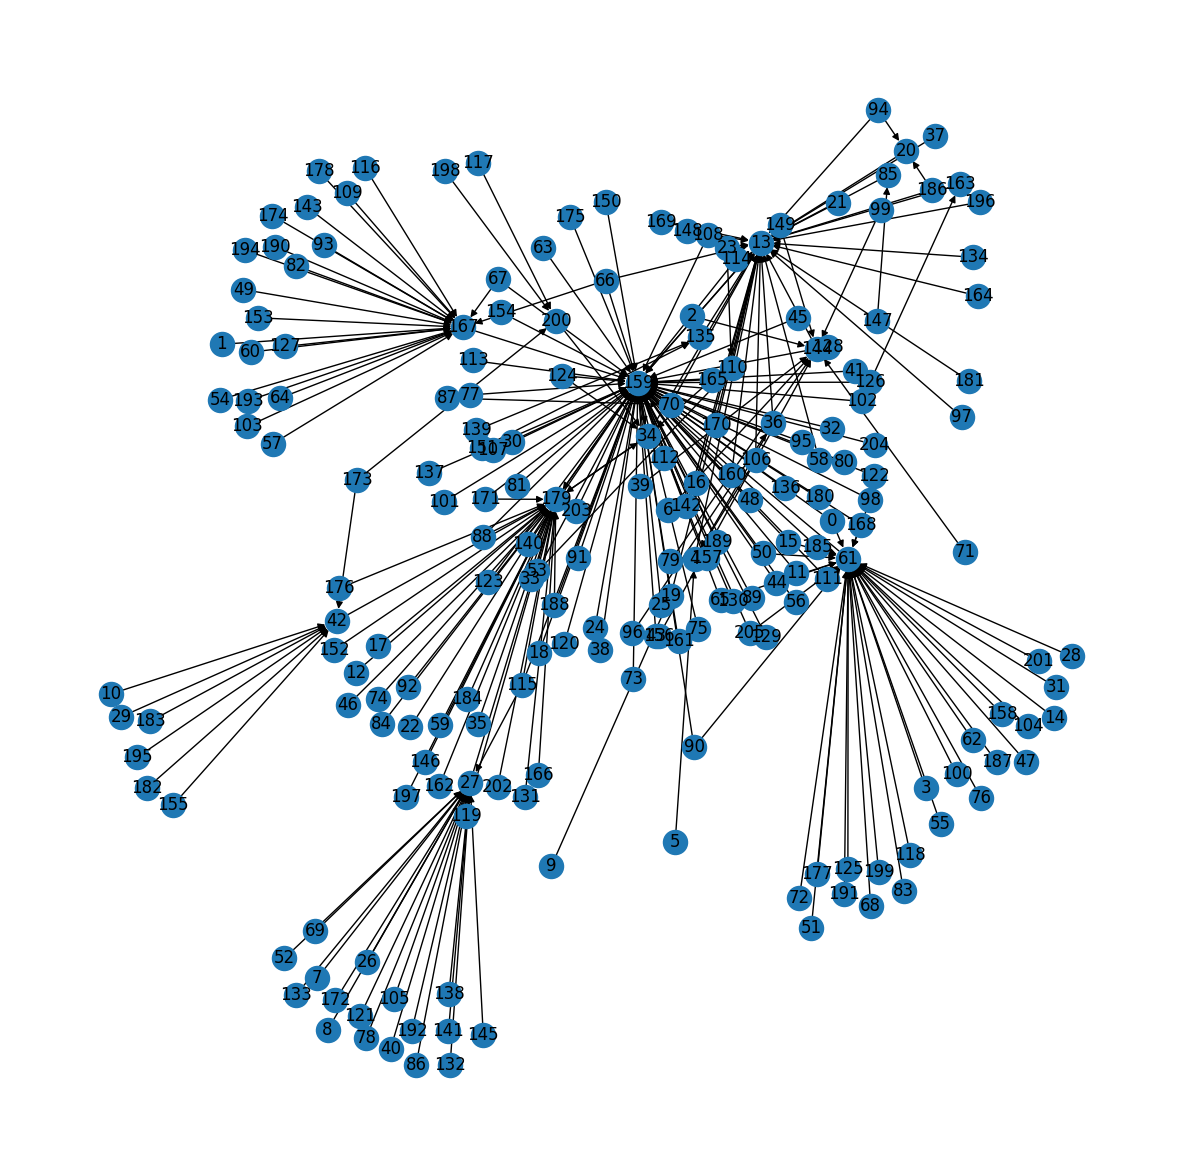

In [30]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(g)